In [2]:
import numpy as np

SOS_token = 26
EOS_token = 27

#Parameter of VAE
input_size = 28
hidden_size = 256  # LSTM hidden size
latent_size = 32
conditional_size = 4
MAX_LENGTH = 17

#Parameter of training
LR = 0.05
kl_annealing_type = 'cycle'
time = 2
EPOCHS = 500

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_kl_weight(epoch, epochs, kl_annealing_type, time):
    assert kl_annealing_type=='monotonic' or kl_annealing_type=='cycle','kl_annealing_type not exist!'

    if kl_annealing_type == 'monotonic':
        return (1./(time-1))*(epoch-1) if epoch<time else 1.

    else: #cycle
        period = epochs//time
        epoch %= period
        KL_weight = sigmoid((epoch - period // 2) / (period // 10)) / 2
        return KL_weight

KL_weight = []
for epoch in (range(500)):
    kl_weight = get_kl_weight(epoch+1,EPOCHS,kl_annealing_type,time)
    KL_weight.append(kl_weight)

def get_kl_weight_ver2(epoch, epochs, kl_annealing_type):

    assert kl_annealing_type=='monotonic' or kl_annealing_type=='cycle','kl_annealing_type not exist!'

    if kl_annealing_type == 'monotonic':
        if epoch < 50:
            return 0.02*epoch
        else:
            return 1
    else: #cycle
        period = epochs//2 
        epoch %= period
        if epoch<200:
            return 0.0025*epoch
        else:
            return 0.5
        
KL_weight_new = []
for epoch in (range(500)):
    kl_weight = get_kl_weight_ver2(epoch+1,EPOCHS,kl_annealing_type)
    KL_weight_new.append(kl_weight)
    
def get_kl_weight_ver3(epoch, epochs, kl_annealing_type):

    assert kl_annealing_type=='monotonic' or kl_annealing_type=='cycle','kl_annealing_type not exist!'
    if kl_annealing_type == 'monotonic':
        if epoch < 50:
            return 0.02*epoch
        else:
            return 1
    else: #cycle
        period = epochs//2 
        epoch %= period
        if epoch < 249:
            return sigmoid((epoch-125)/25)/2
        else:
            return 0
        
   
KL_weight_new_3 = []
for epoch in (range(500)):
    kl_weight = get_kl_weight_ver3(epoch+1,EPOCHS,kl_annealing_type)
    KL_weight_new_3.append(kl_weight)

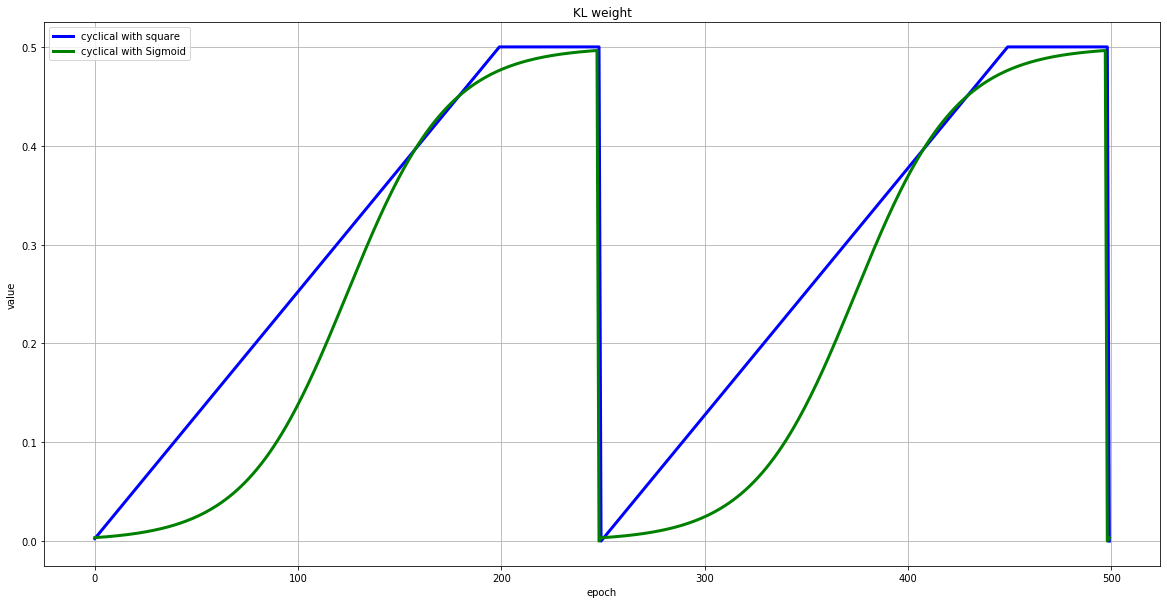

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))


# plt.plot(KL_weight, color='r', linestyle = "-" , linewidth=3)
plt.plot(KL_weight_new, color='b', linestyle = "-" , linewidth=3)
plt.plot(KL_weight_new_3, color='g', linestyle = "-" , linewidth=3)

plt.title('KL weight')
plt.ylabel('value')
plt.xlabel('epoch')

plt.legend(['cyclical with square', 'cyclical with Sigmoid',], loc=0)
plt.grid(True)
plt.show()
